In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics.classification import accuracy_score, log_loss
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [37]:
### AMAZON ###

df = pd.read_csv('./results/week2.csv')
df['Symbol'] = 'AMAZON'
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,TTQ,Month,Year,PxV,Day_Perc_Change,Trend,Symbol
0,2019-10-24,1780.78,1770.78,1787.97,1760.78,5.20M,5200000,10,2019,9.260056e+09,0.000000,No Change,AMAZON
1,2019-10-23,1762.17,1761.30,1770.05,1742.00,2.19M,2190000,10,2019,3.859152e+09,-0.010450,No Change,AMAZON
2,2019-10-22,1765.73,1788.15,1789.78,1762.00,2.23M,2230000,10,2019,3.937578e+09,0.002020,No Change,AMAZON
3,2019-10-21,1785.66,1769.66,1785.88,1765.00,2.22M,2220000,10,2019,3.964165e+09,0.011287,No Change,AMAZON
4,2019-10-18,1757.51,1787.80,1793.98,1749.20,3.37M,3370000,10,2019,5.922809e+09,-0.015764,No Change,AMAZON


In [38]:
def meanDailyReturns(df):
    return df['Close Price'].pct_change().dropna().mean()
def dailyStd(df):
    return df['Close Price'].pct_change().dropna().std()
def meanAnnualReturns(df):
    return meanDailyReturns(df) * 252
def annualStd(df):
    return dailyStd(df) * np.sqrt(252)

In [39]:
def output(df):
    if 'Symbol' in df:
        print('Company :\t {}'.format(df['Symbol'].iloc[1]))
    print('Mean daily return :\t\t {}'.format(meanDailyReturns(df)))
    print('Daily standard deviation :\t {} '.format(dailyStd(df)))
    print('Mean annual return :\t\t {}'.format(meanAnnualReturns(df)))
    print('Annual standard deviation :\t {}'.format(annualStd(df)))

In [40]:
output(df)

Company :	 AMAZON
Mean daily return :		 -0.0010076003223422935
Daily standard deviation :	 0.019791922065559995 
Mean annual return :		 -0.25391528123025797
Annual standard deviation :	 0.31418702252066133


In [41]:
df_cipla = pd.read_csv('./data/Large_Cap/CIPLA.csv')
df_hero = pd.read_csv('./data/Large_Cap/HEROMOTOCO.csv')
df_tata = pd.read_csv('./data/Mid_Cap/TATAPOWER.csv')
df_dhfl = pd.read_csv('./data/Mid_Cap/DHFL.csv')
df_pvr = pd.read_csv('./data/Small_Cap/PVR.csv')

In [42]:
l=[df,df_cipla,df_hero,df_tata,df_dhfl, df_pvr]
for i in l:
    output(i)
    print('-'*70)

Company :	 AMAZON
Mean daily return :		 -0.0010076003223422935
Daily standard deviation :	 0.019791922065559995 
Mean annual return :		 -0.25391528123025797
Annual standard deviation :	 0.31418702252066133
----------------------------------------------------------------------
Company :	 CIPLA
Mean daily return :		 4.6701476775483235e-05
Daily standard deviation :	 0.01599678237409395 
Mean annual return :		 0.011768772147421775
Annual standard deviation :	 0.25394104763444403
----------------------------------------------------------------------
Company :	 HEROMOTOCO
Mean daily return :		 -0.0005696213914633644
Daily standard deviation :	 0.015064453115429437 
Mean annual return :		 -0.14354459064876784
Annual standard deviation :	 0.23914077948371096
----------------------------------------------------------------------
Company :	 TATAPOWER
Mean daily return :		 -0.00039825554161450544
Daily standard deviation :	 0.019418910645784795 
Mean annual return :		 -0.10036039648685537
Annual

In [44]:
portfolio = pd.DataFrame()
for i in l:
    portfolio[ '{}'.format(i['Symbol'].iloc[1]) ] = i['Close Price']
portfolio.head()

,AMAZON,CIPLA,HEROMOTOCO,TATAPOWER,DHFL,PVR
0,1780.78,569.00,3515.45,83.55,431.4,1524.95
1,1762.17,565.60,3619.40,83.85,1009.9,1539.00
2,1765.73,562.35,3645.95,85.35,1055.2,1530.30
3,1785.66,560.10,3592.05,83.75,1070.0,1515.05
4,1757.51,564.95,3571.65,84.15,1050.0,1513.55


In [46]:
equal_weights = np.full( portfolio.shape[1], 1/portfolio.shape[1])
def annual_returns(portfolio, weights):
    return  np.sum(portfolio.pct_change().mean() * weights ) * 252
annual_returns(portfolio, equal_weights)

4.569585041047831

In [47]:
portfolio_cv = portfolio.pct_change().cov()
portfolio_cv

,AMAZON,CIPLA,HEROMOTOCO,TATAPOWER,DHFL,PVR
AMAZON,0.000392,0.000012,0.000035,-0.000027,0.000384,-0.000009
CIPLA,0.000012,0.000252,0.000047,0.000076,0.000174,0.000032
HEROMOTOCO,0.000035,0.000047,0.000223,0.000060,0.000261,0.000031
TATAPOWER,-0.000027,0.000076,0.000060,0.000371,-0.000418,0.000029
DHFL,0.000384,0.000174,0.000261,-0.000418,0.280328,0.000298
PVR,-0.000009,0.000032,0.000031,0.000029,0.000298,0.000375


In [49]:
def annual_volatility( portfolio, weights ): 
    return np.sqrt(np.dot(weights.T, np.dot( portfolio_cv, weights )) * np.sqrt(252))
annual_volatility(portfolio, equal_weights)

0.3538256494570958

In [51]:
def portfolio_sharpe( portfolio, weights ): 
    return portfolio_annual_returns( portfolio, weights ) /annual_volatility( portfolio, weights )
portfolio_sharpe(portfolio, equal_weights)

12.914793057143612

In [52]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

random_weights()

array([0.245, 0.039, 0.123, 0.309, 0.217, 0.067])

In [54]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = annual_returns(    portfolio, weights )
    volatility = annual_volatility( portfolio, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{
        "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe
    }])
scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()

,returns,sharpe,volatility,weights
0,1.377379,11.786156,0.116864,"[0.05, 0.044, 0.085, 0.48, 0.051, 0.29]"
1,7.735838,13.076363,0.591589,"[0.097, 0.125, 0.102, 0.246, 0.28, 0.15]"
2,4.981892,13.006729,0.383024,"[0.05494505494505494, 0.24175824175824173, 0.0..."
3,6.150002,13.050069,0.471262,"[0.15215215215215214, 0.26326326326326327, 0.1..."
4,9.867454,13.075593,0.754647,"[0.132, 0.104, 0.23, 0.04, 0.357, 0.137]"


In [55]:
point_min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin() ]
point_min_volatility

returns                                             -0.00317895
sharpe                                                -0.084139
volatility                                            0.0377821
weights       [0.22522522522522526, 0.1751751751751752, 0.23...
Name: 215, dtype: object

In [56]:
point_max_sharpe = scatter_data.loc[ scatter_data['sharpe'].idxmax()     ]
point_max_sharpe

returns                                                 10.2667
sharpe                                                  13.1818
volatility                                              0.77885
weights       [0.003996003996003996, 0.13286713286713286, 0....
Name: 399, dtype: object

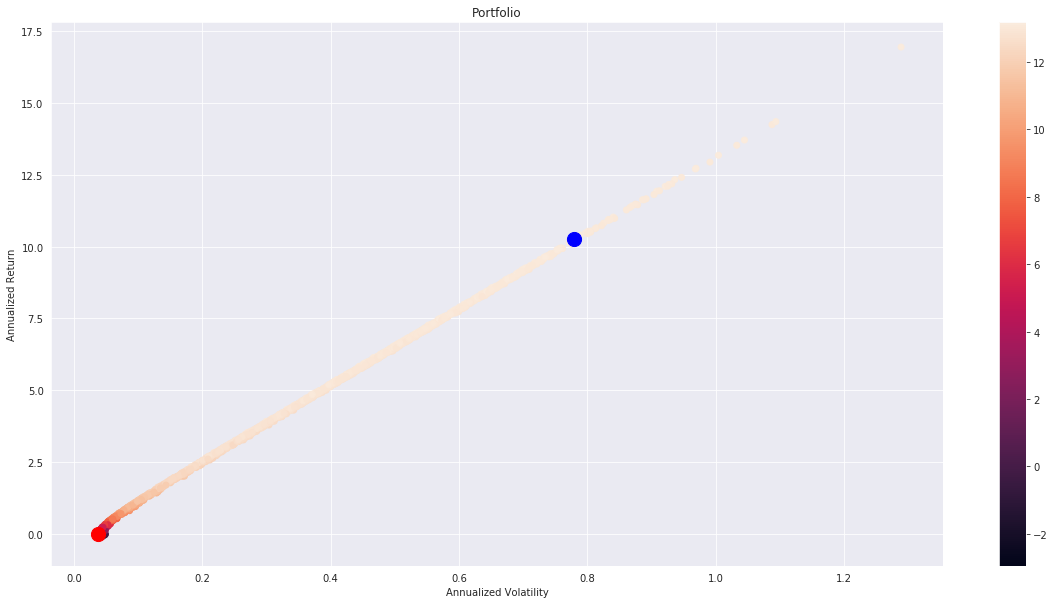

In [57]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe
)
plt.title('Portfolio')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()
plt.scatter( point_max_sharpe.volatility,     point_max_sharpe.returns, c='b',s=200)
plt.scatter( point_min_volatility.volatility, point_min_volatility.returns, c='r',s=200)